## Importing packages

In [ ]:
#importing the packages
import pandas as pd
import numpy as np
from numpy import arange
from numpy import isnan
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
import math
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score , precision_score , roc_auc_score ,roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from google.colab import files
uploaded = files.upload()

Saving iris_dataset_missing.csv to iris_dataset_missing (1).csv


## [CM1] Data Cleaning and Normalization

In [ ]:
#Loading the data
#iris = pd.read_csv('C:/Users/SAM/OneDrive - University of Waterloo/Spring 2021/ECE657A/Assignment 1/iris_dataset_missing.csv')
#df_iris = pd.DataFrame(iris)
df_iris = pd.read_csv("iris_dataset_missing.csv")
#Describing the data
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,101.000000,97.000000,105.000000
mean,5.858909,3.059083,3.812370,1.199708
std,0.861638,0.455116,1.793489,0.787193
min,4.344007,1.946010,1.033031,-0.072203
25%,5.159145,2.768688,1.545136,0.333494
50%,5.736104,3.049459,4.276817,1.331797
75%,6.435413,3.290318,5.094427,1.817211
max,7.795561,4.409565,6.768611,2.603123


In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  105 non-null    float64
 1   sepal_width   101 non-null    float64
 2   petal_length  97 non-null     float64
 3   petal_width   105 non-null    float64
 4   species       105 non-null    object 
dtypes: float64(4), object(1)
memory usage: 4.2+ KB


In [ ]:
#numeric encoding the categorical species variables for easy data exploration
df_iris.species = df_iris.species.replace({'Iris-versicolor':0,'Iris-setosa' : 1, 'Iris-virginica' : 2})
df_iris.head(5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.045070,2.508203,3.018024,1.164924,0
1,6.325517,2.115481,4.542052,1.413651,0
2,5.257497,3.814303,1.470660,0.395348,1
3,6.675168,3.201700,5.785461,2.362764,2
4,5.595237,2.678166,4.077750,1.369266,0


In [ ]:
# rows that contain duplicate value
dup_iris = df_iris.duplicated()
print(dup_iris.any())

#columns with single values
print(df_iris.nunique())

# Finding missing values in the data sets
print(df_iris.isnull().sum())


False
sepal_length    105
sepal_width     101
petal_length     97
petal_width     105
species           3
dtype: int64
sepal_length    0
sepal_width     4
petal_length    8
petal_width     0
species         0
dtype: int64


In [ ]:
#introducing index column to sort back the data to its original order after interpolation.
df_iris.reset_index(level=0, inplace=True)
#sorting data based on species column
df_iris = df_iris.sort_values(by='species')
#Using interpolation 
df_iris = df_iris.interpolate()
#sorting the data back to its original order
df_iris = df_iris.sort_values(by='index')
df_iris.drop(["index"], axis = 1, inplace = True)
#df_iris.head(25)
print(df_iris.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:
#removing negative values
df_iris['petal_width'] = df_iris['petal_width'].abs()
# rounding off the values of each columns.
df_iris['sepal_length'] = df_iris['sepal_length'].round(decimals=1)
df_iris['sepal_width'] = df_iris['sepal_width'].round(decimals=1)
df_iris['petal_length'] = df_iris['petal_length'].round(decimals=1)
df_iris['petal_width'] = df_iris['petal_width'].round(decimals=1)
df_iris.head(10)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.0,2.5,3.0,1.2,0
1,6.3,2.1,4.5,1.4,0
2,5.3,3.8,1.5,0.4,1
3,6.7,3.2,5.8,2.4,2
4,5.6,2.7,4.1,1.4,0
5,6.7,3.1,5.0,2.4,2
6,4.8,3.0,1.5,0.0,1
7,5.2,3.4,1.7,0.1,1
8,4.4,2.9,1.4,0.4,1
9,6.8,3.1,5.9,2.2,2


## [CM1] Normalization

     sepal_length  sepal_width  petal_length  petal_width  species
0       -0.993164    -1.235105     -0.441947    -0.008468        0
1        0.521550    -2.129492      0.395678     0.245561        0
2       -0.643615     1.671651     -1.279573    -1.024583        1
3        0.987616     0.330071      1.121621     1.515706        2
4       -0.294065    -0.787912      0.172312     0.245561        0
..            ...          ...           ...          ...      ...
100     -1.109680     0.330071     -1.223731    -1.405626        1
101     -0.294065    -0.564315     -0.162739    -0.135482        0
102     -0.410582     2.566038     -1.279573    -1.278612        1
103     -0.410582    -0.787912      0.283995     0.118547        0
104     -1.575746     0.106475     -1.279573    -1.278612        1

[105 rows x 5 columns]


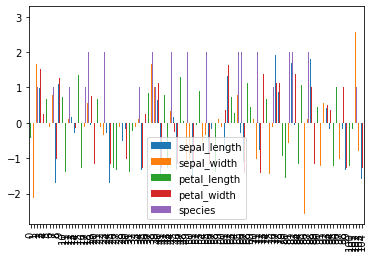

In [ ]:
#----------- Z-SCORE TECHNIQUE -----------#
# copy the data and keeping the target attribute away from normalization.
df_z_scaled_iris = df_iris.copy()
columns_to_scale = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Using StandardScaler() method from sklearn.preprocessing package for normalizing the data using Z-Score normalization technique..
stds = StandardScaler()
df_z_scaled_iris[columns_to_scale] = stds.fit_transform(df_z_scaled_iris[columns_to_scale])


# view normalized data
df_z_scaled_iris.plot(kind='bar')
print(df_z_scaled_iris)

     sepal_length  sepal_width  petal_length  petal_width  species
0        0.200000         0.24      0.344828     0.461538        0
1        0.571429         0.08      0.603448     0.538462        0
2        0.285714         0.76      0.086207     0.153846        1
3        0.685714         0.52      0.827586     0.923077        2
4        0.371429         0.32      0.534483     0.538462        0
..            ...          ...           ...          ...      ...
100      0.171429         0.52      0.103448     0.038462        1
101      0.371429         0.36      0.431034     0.423077        0
102      0.342857         0.92      0.086207     0.076923        1
103      0.342857         0.32      0.568966     0.500000        0
104      0.057143         0.48      0.086207     0.076923        1

[105 rows x 5 columns]


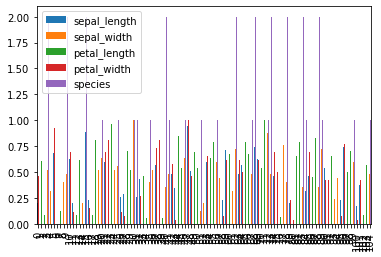

In [ ]:
#----------- MIN-MAX TECHNIQUE -----------#

# copy the data and keeping the target attribute away from normalization.
species = df_iris['species'].tolist()
df_min_max_scaled_iris = df_iris.iloc[:,0:4].copy()
  
# apply normalization max-min feature scaling technique
for column in df_min_max_scaled_iris.columns:
    df_min_max_scaled_iris[column] = (df_min_max_scaled_iris[column] - df_min_max_scaled_iris[column].min()) / (df_min_max_scaled_iris[column].max() - df_min_max_scaled_iris[column].min())    

df_min_max_scaled_iris['species'] = species

# view normalized data
df_min_max_scaled_iris.plot(kind='bar')
print(df_min_max_scaled_iris)

## [CM2] Pair plot Visualizations

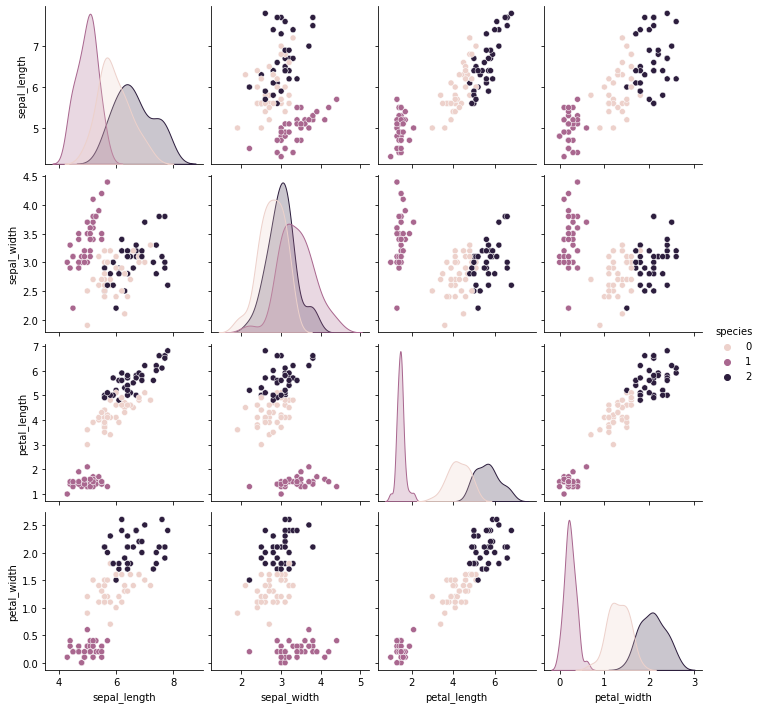

In [ ]:
#pairplot for iris dataset
sns.pairplot(df_iris,hue="species")

## [CM3] Correlation and Statistical Measures

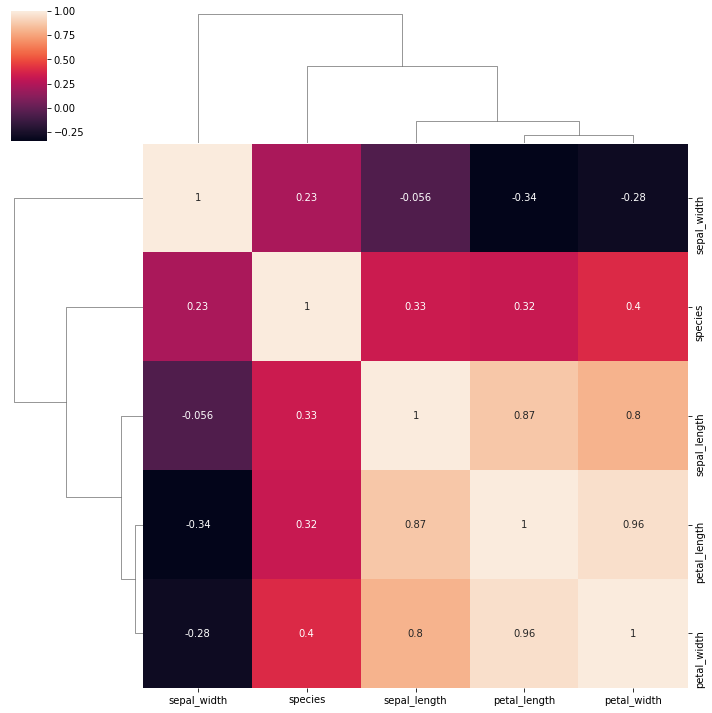

In [ ]:
#clustermap for iris dataset
sns.clustermap(df_z_scaled_iris.corr(),annot=True)


In [ ]:
#Calculating mean,variance,kurtosis and skew

In [ ]:
df_iris.mean()

sepal_length    5.852381
sepal_width     3.052381
petal_length    3.791429
petal_width     1.206667
species         1.000000
dtype: float64

In [ ]:
df_iris.var()

sepal_length    0.743672
sepal_width     0.201941
petal_length    3.237714
petal_width     0.625821
species         0.673077
dtype: float64

In [ ]:
df_iris.kurt()

sepal_length   -0.523430
sepal_width     0.526888
petal_length   -1.415097
petal_width    -1.331128
species        -1.514563
dtype: float64

In [ ]:
df_iris.skew()

sepal_length    0.389386
sepal_width     0.333506
petal_length   -0.241560
petal_width    -0.060679
species         0.000000
dtype: float64

### [CM4] Dividing the data into a training set and a test set. Train the model with the classifer's default parameters.

In [ ]:
# We are using input as Z scaled version of the cleaned data, i.e., df_z_scaled_iris.
# Independent features
x = df_z_scaled_iris.drop(['species'], axis=1)
# Dependent features
y = df_z_scaled_iris['species']
knn_scores = []
# Checking the accuracy for different sizes of the train-test sets, starting for 95%-5% to 55%-45% (train%-test%)
for i in arange(0.05,0.50,0.05):
    # Splitting the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = i, random_state = 98)
    # KNeighborsClassifier with default parameters.
    knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
    knn1.fit(x_train, y_train)
    yhat = knn1.predict(x_test)
    # Storing the accuracy scores in an array.
    knn_scores.append(accuracy_score(y_test, yhat))

print(knn_scores)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9761904761904762, 0.9791666666666666]


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.98, 0.98]


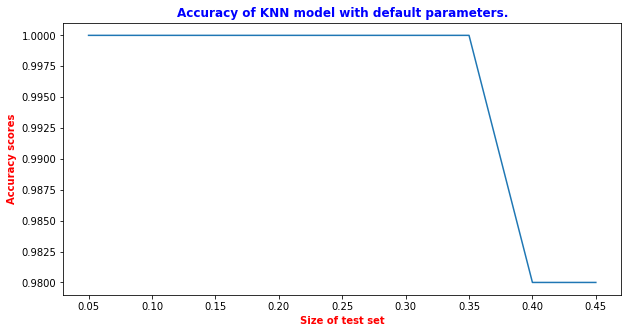

In [ ]:
# Rounding off the scores to 2 decimal places.
knn_scores = [ '%.2f' % elem for elem in knn_scores ]
knn_scores = [float(line) for line in knn_scores]

# Plotting the graph of accuracy scores against the size of test set. 
x_axis = ['0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45']
f, ax = plt.subplots(1, 1, figsize = (10, 5))
plt.plot(x_axis, knn_scores)
plt.xlabel('Size of test set',color='Red',weight='bold')
plt.ylabel('Accuracy scores',color='Red',weight='bold')
plt.title('Accuracy of KNN model with default parameters.',color='Blue',weight='bold')
print(knn_scores)

In [ ]:
# following the guidlines given in the assignment we will be taking test_size = 0.20, i.e., training set and a test set (80%, 20%).
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 98)
# shape of train and test sets,
print(' Size of training (80%) is - {0},{1}'.format(x_train.shape, y_train.shape))
print(' Size of testing (20%) is - {0},{1}'.format(x_test.shape, y_test.shape))

 Size of training (80%) is - (84, 4),(84,)
 Size of testing (20%) is - (21, 4),(21,)


### [CM5]: Tuning the Classifier

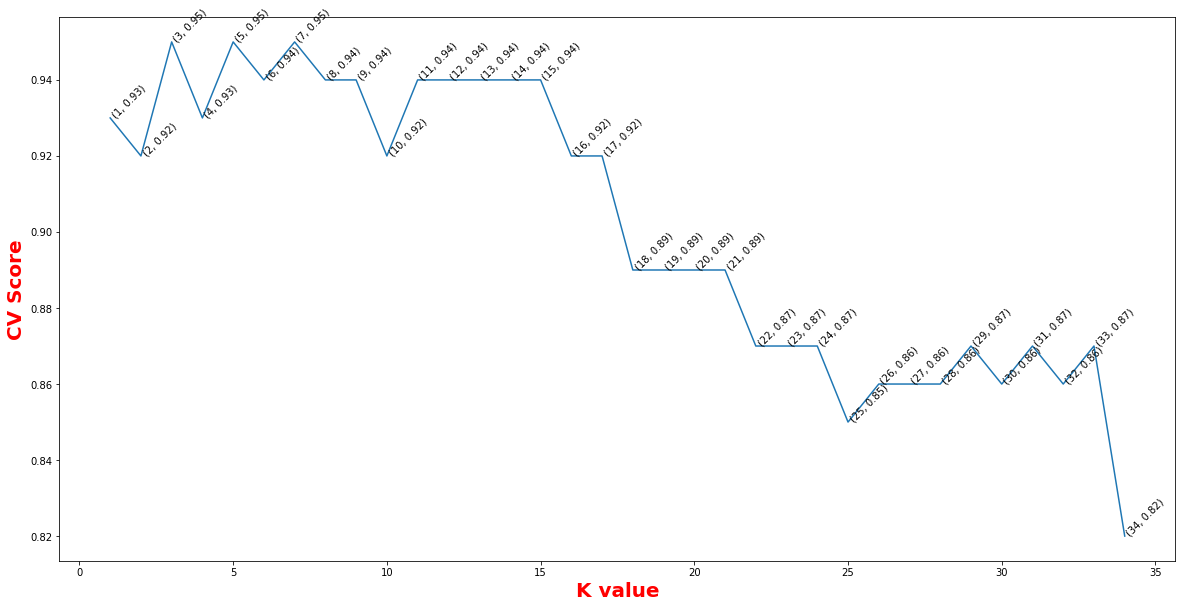

In [ ]:
# Using 5-fold cross validation on the training set to train the classifer and produce accuracy scores.
cv_scores = []
# k values
neighbors = list(np.arange(1,35,1))
#training the knn classifier for different values of k along with k-fold cross validation (for tuning).
for n in neighbors:
    knn2 = KNeighborsClassifier(n_neighbors = n)
    cross_val = cross_val_score(knn2,x_train,y_train,cv = 5 , scoring = 'accuracy')
    cv_scores.append(cross_val.mean())

# Rounding off the scores to 2 decimal places.
cv_scores = [ '%.2f' % elem for elem in cv_scores ]
cv_scores = [float(line) for line in cv_scores]

# Plotting the graph of accuracy scores against k values. 
f, ax = plt.subplots(1, 1, figsize = (20, 10))
plt.xlabel("K value",color='Red',weight='bold',fontsize='20')
plt.ylabel("CV Score",color='Red',weight='bold',fontsize='20')
for i in range(1,35):
    plt.text(i, cv_scores[i-1], (i, cv_scores[i-1]), fontsize=10, rotation=45)
plt.plot(neighbors, cv_scores)

In [ ]:
#Calculating standard deviation of VC accuaracies to see the degree of variance in the obtained results.
cv_scores = np.array(cv_scores)
print(cv_scores.var())

0.0013615916955017297


### [CM6]: Using the best found parameter

In [ ]:
# Using the best found parameter, fitting the model on the entire training set and predict the target on the test set.    

# best found value of k
optimal_n = 3
knn2 = KNeighborsClassifier(n_neighbors = optimal_n)
# fitting the model on the entire training set
knn2.fit(x_train,y_train)
# predict the target on the test set
y_pred = knn2.predict(x_test)
# storing the accuracy and reporting it
acc = accuracy_score(y_test,y_pred)*100
print("The accuracy for optimal k = {0} is {1}".format(optimal_n,acc))

The accuracy for optimal k = 3 is 100.0


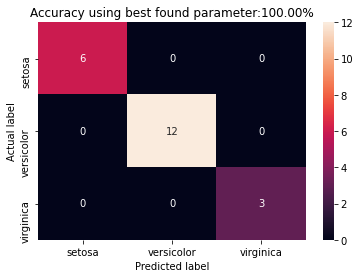

In [ ]:
# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['setosa','versicolor','virginica'], columns = ['setosa','versicolor','virginica'])
# Plotting the matrix
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using best found parameter:{0:.2f}%'.format(acc))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         3

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



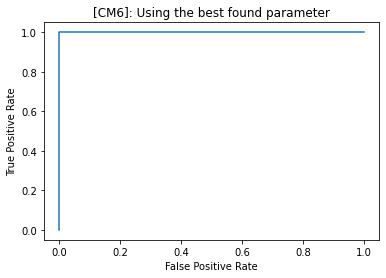

In [ ]:
# Reporting the AUC, f-score and other classification report scores.
print("classification_report")
print(classification_report(y_test,y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('[CM6]: Using the best found parameter')
plt.show()


### CM7: Improved Model

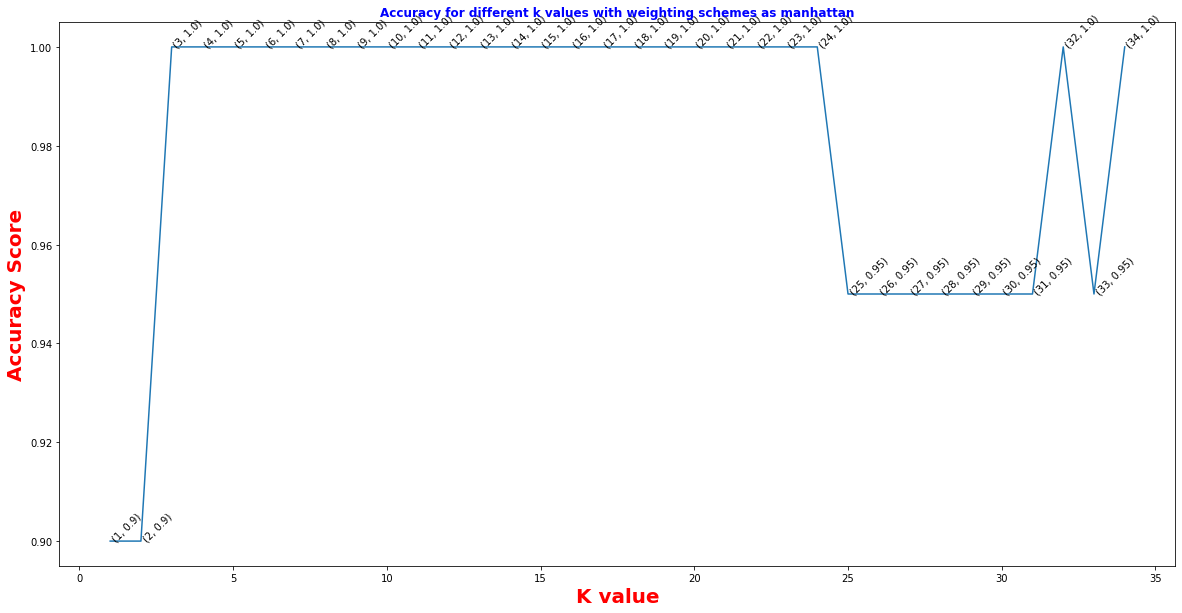

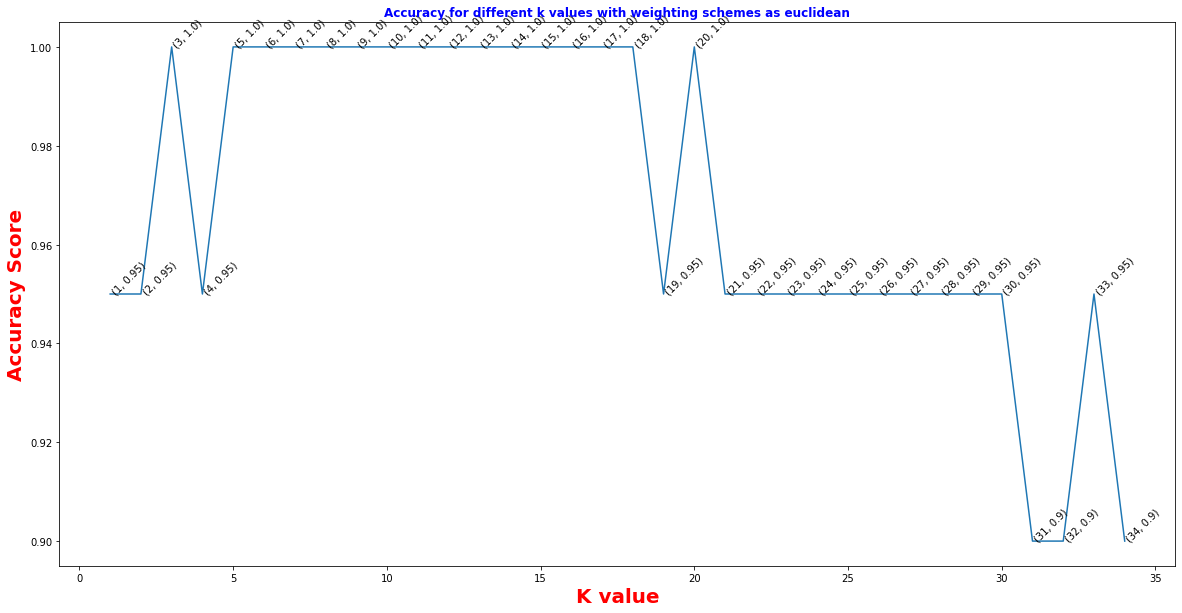

In [ ]:
# Using Weighted KNN ( weights='distance') with weighting schemes as manhattan (metric='manhattan')

knn_scores = []
for n in list(np.arange(1,35,1)):
   # KNeighborsClassifier with default parameters.
    knn3 = KNeighborsClassifier(n_neighbors=n,weights='distance',metric='manhattan')
    knn3.fit(x_train, y_train)
    yhat = knn3.predict(x_test)
    knn_scores.append(accuracy_score(y_test, yhat))

knn_scores = [ '%.2f' % elem for elem in knn_scores ]
knn_scores = [float(line) for line in knn_scores]
f, ax = plt.subplots(1, 1, figsize = (20, 10))
plt.xlabel("K value",color='Red',weight='bold',fontsize='20')
plt.ylabel("Accuracy Score",color='Red',weight='bold',fontsize='20')
title = 'Accuracy for different k values with weighting schemes as manhattan'
plt.title(title,color='Blue',weight='bold')
for i in range(1,35):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]), fontsize=10, rotation=45  )
plt.plot(neighbors, knn_scores)


# Using Weighted KNN ( weights='distance') with weighting schemes as euclidean (metric='euclidean')

knn_scores = []
for n in list(np.arange(1,35,1)):
   # KNeighborsClassifier with default parameters.
    knn4 = KNeighborsClassifier(n_neighbors=n,weights='distance',metric='euclidean')
    knn4.fit(x_train, y_train)
    yhat = knn4.predict(x_test)
    knn_scores.append(accuracy_score(y_test, yhat))

knn_scores = [ '%.2f' % elem for elem in knn_scores ]
knn_scores = [float(line) for line in knn_scores]
f, ax = plt.subplots(1, 1, figsize = (20, 10))
plt.xlabel("K value",color='Red',weight='bold',fontsize='20')
plt.ylabel("Accuracy Score",color='Red',weight='bold',fontsize='20')
title = 'Accuracy for different k values with weighting schemes as euclidean'
plt.title(title,color='Blue',weight='bold')
for i in range(1,35):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]), fontsize=10, rotation=45  )
plt.plot(neighbors, knn_scores)




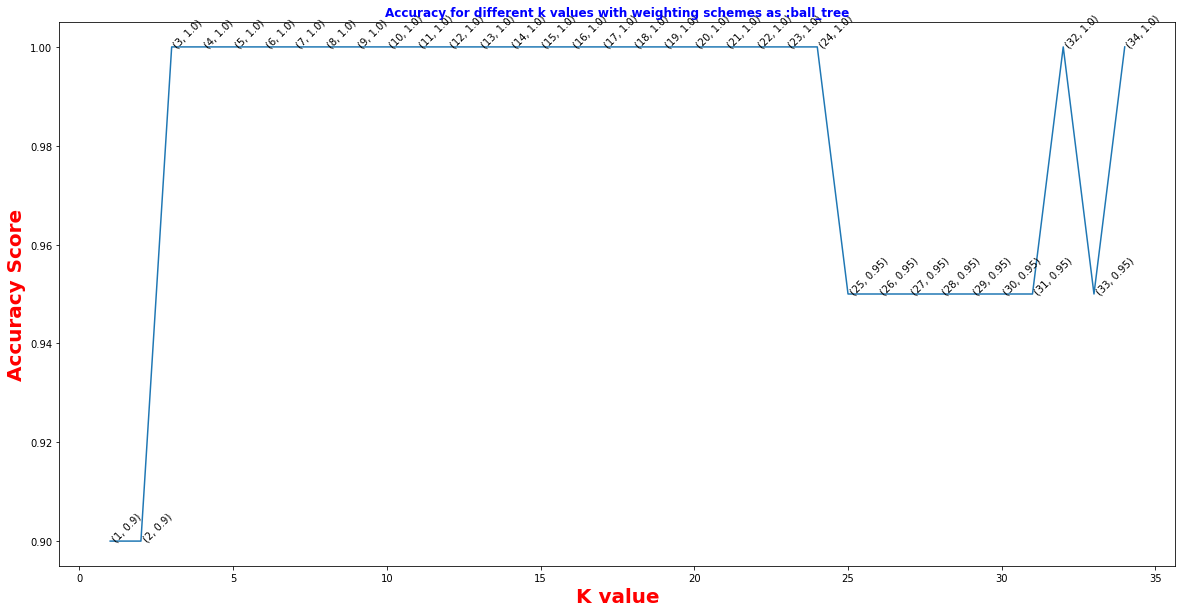

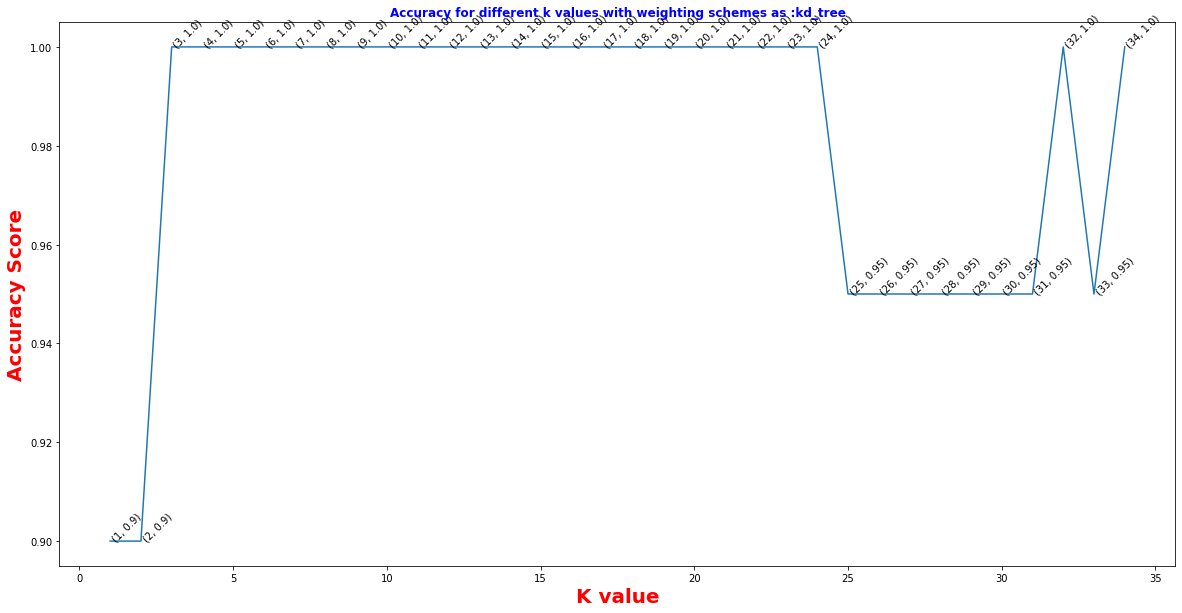

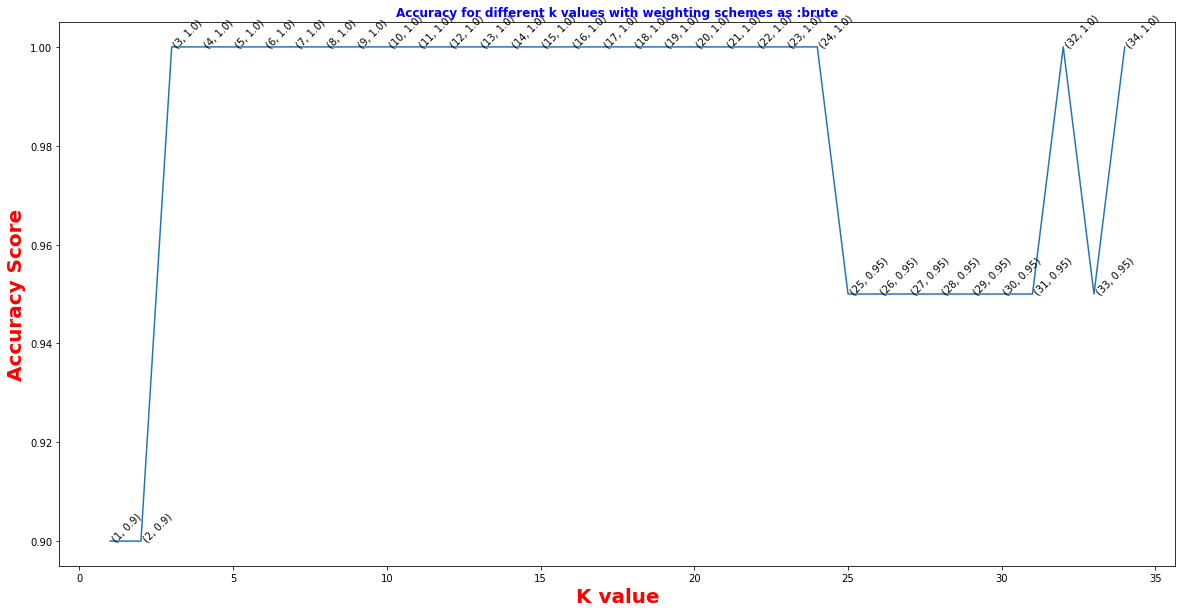

In [ ]:
# Different NN Algorithms, i.e., algorithm = (‘ball_tree’, ‘kd_tree’, ‘brute’)
# Taking weighting schemes as manhattan (metric='manhattan').
algo = ['ball_tree', 'kd_tree', 'brute']
for a in range(len(algo)):
    knn_scores = []
    for n in list(np.arange(1,35,1)):
       # KNeighborsClassifier with default parameters.
        knn5 = KNeighborsClassifier(n_neighbors=n, algorithm=algo[a], weights='distance',metric='manhattan')
        knn5.fit(x_train, y_train)
        y_pred = knn5.predict(x_test)
        knn_scores.append(accuracy_score(y_test, y_pred))

    knn_scores = [ '%.2f' % elem for elem in knn_scores ]
    knn_scores = [float(line) for line in knn_scores]
    f, ax = plt.subplots(1, 1, figsize = (20, 10))
    plt.xlabel("K value",color='Red',weight='bold',fontsize='20')
    plt.ylabel("Accuracy Score",color='Red',weight='bold',fontsize='20')
    title = 'Accuracy for different k values with weighting schemes as :' + algo[a]
    plt.title(title,color='Blue',weight='bold')
    for i in range(1,35):
        plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]), fontsize=10, rotation=45  )
    plt.plot(neighbors, knn_scores)
    


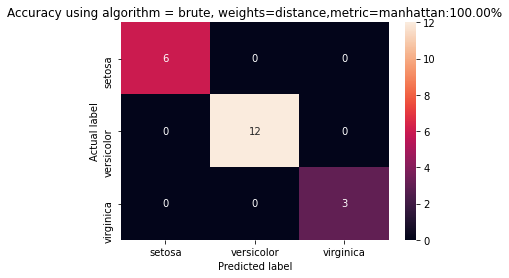

In [ ]:
# Taking weighting schemes as manhattan (metric='manhattan') and algorithm = ‘brute’
# Calculating ROC and classification scores.

knn6 = KNeighborsClassifier(n_neighbors=3, algorithm = 'brute', weights='distance',metric='manhattan')
knn6.fit(x_train, y_train)
y_pred = knn6.predict(x_test)
knn_scores.append(accuracy_score(y_test, y_pred))

# Creates a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['setosa','versicolor','virginica'], columns = ['setosa','versicolor','virginica'])
# Plotting the matrix
sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using algorithm = brute, weights=distance,metric=manhattan:{0:.2f}%'.format(acc))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         3

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



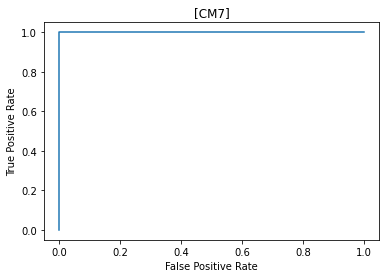

In [ ]:
# Reporting the AUC, f-score and other classification report scores.
print("classification_report")
print(classification_report(y_test,y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)
metrics.auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('[CM7]')
plt.show()